In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/processed/electric_vehicles_cleaned.csv')
df.head()

,vin_1_10,county,city,state,zip_code,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,geocoded_column,electric_utility,_2020_census_tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,187279214,"{'type': 'Point', 'coordinates': [-120.1871, 4...",PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,210098241,"{'type': 'Point', 'coordinates': [-120.52041, ...",PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,44.0,121781950,"{'type': 'Point', 'coordinates': [-122.18637, ...",PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,14.0,180778377,"{'type': 'Point', 'coordinates': [-120.60199, ...",PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,2581225,"{'type': 'Point', 'coordinates': [-122.65223, ...",PUGET SOUND ENERGY INC,5.303508e+10


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin_1_10              9996 non-null   object 
 1   county                9996 non-null   object 
 2   city                  9996 non-null   object 
 3   state                 9996 non-null   object 
 4   zip_code              9996 non-null   float64
 5   model_year            9996 non-null   int64  
 6   make                  9996 non-null   object 
 7   model                 9996 non-null   object 
 8   ev_type               9996 non-null   object 
 9   cafv_type             9996 non-null   object 
 10  electric_range        9996 non-null   int64  
 11  base_msrp             9996 non-null   int64  
 12  legislative_district  9996 non-null   float64
 13  dol_vehicle_id        9996 non-null   int64  
 14  geocoded_column       9996 non-null   object 
 15  electric_utility     

In [50]:
df.describe(include='all')

,vin_1_10,county,city,state,zip_code,model_year,make,model,ev_type,cafv_type,electric_range,base_msrp,legislative_district,dol_vehicle_id,geocoded_column,electric_utility,_2020_census_tract
count,9996,9996,9996,9996,9996.000000,9996.000000,9996,9996,9996,9996,9996.000000,9996.000000,9996.000000,9.996000e+03,9996,9996,9.996000e+03
unique,4396,21,131,1,NaN,NaN,38,142,2,3,NaN,NaN,NaN,NaN,196,21,NaN
top,7SAYGDEEXP,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-122.2066, 4...",PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,58,7219,2138,9996,NaN,NaN,4323,2154,8025,5941,NaN,NaN,NaN,NaN,709,4803,NaN
mean,NaN,NaN,NaN,NaN,98184.259504,2021.503001,NaN,NaN,NaN,NaN,47.160464,715.258603,34.237395,2.371622e+08,NaN,NaN,5.303356e+10
std,NaN,NaN,NaN,NaN,233.018220,3.059767,NaN,NaN,NaN,NaN,84.665505,6819.822103,14.151434,6.951344e+07,NaN,NaN,1.235000e+07
min,NaN,NaN,NaN,NaN,98001.000000,2008.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.100570e+05,NaN,NaN,5.300796e+10
25%,NaN,NaN,NaN,NaN,98033.000000,2020.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,23.000000,2.070643e+08,NaN,NaN,5.303300e+10
50%,NaN,NaN,NaN,NaN,98103.000000,2023.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,41.000000,2.554882e+08,NaN,NaN,5.303302e+10
75%,NaN,NaN,NaN,NaN,98178.000000,2024.000000,NaN,NaN,NaN,NaN,40.000000,0.000000,46.000000,2.728056e+08,NaN,NaN,5.303303e+10


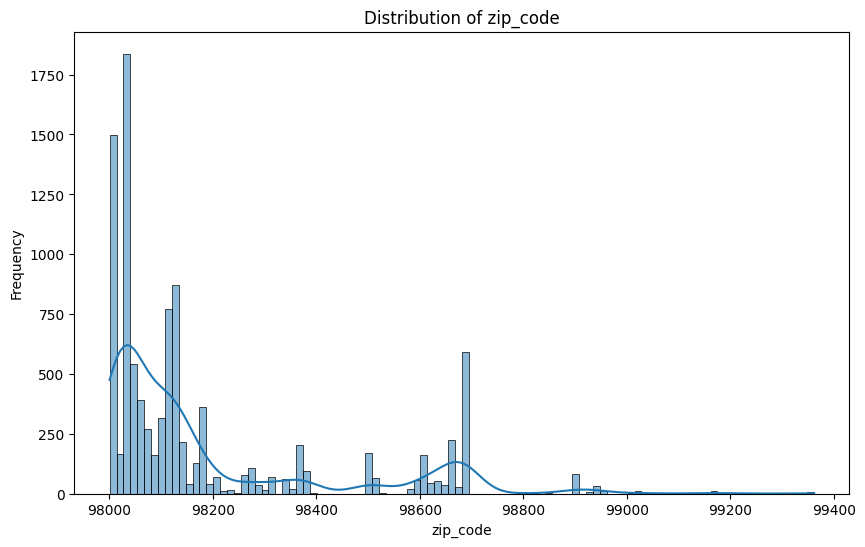

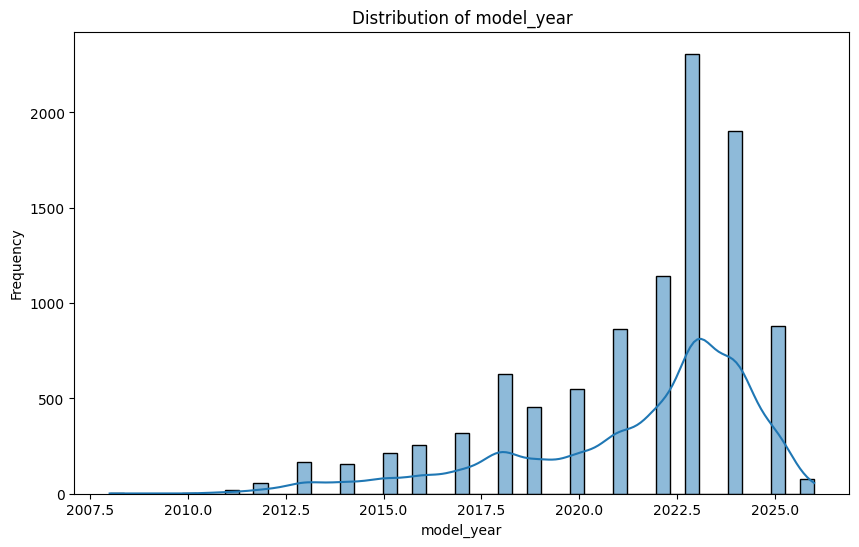

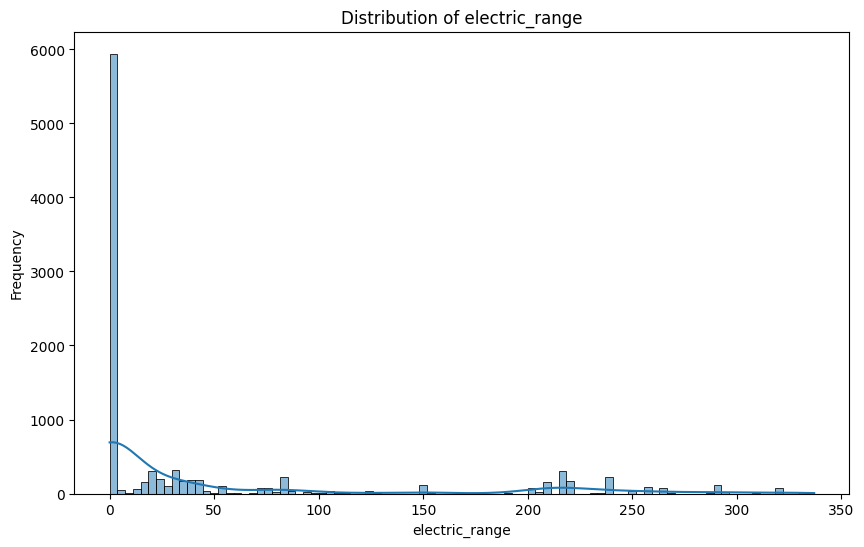

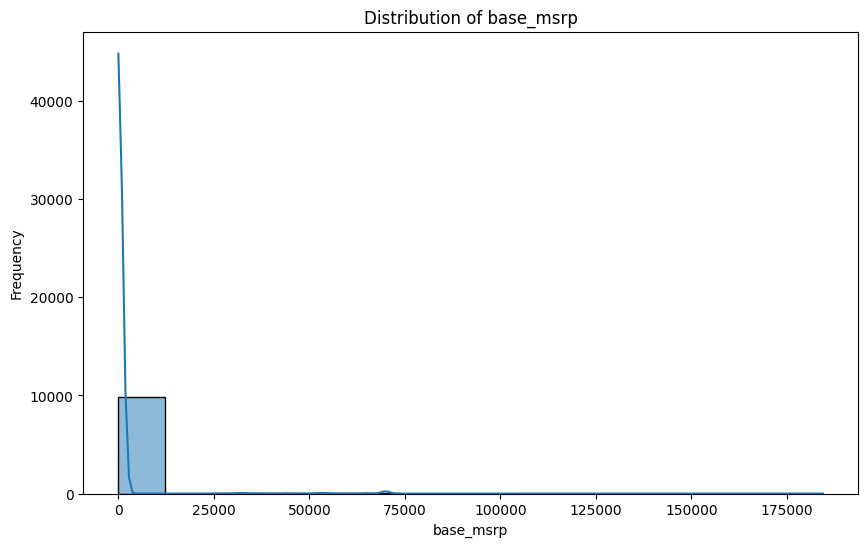

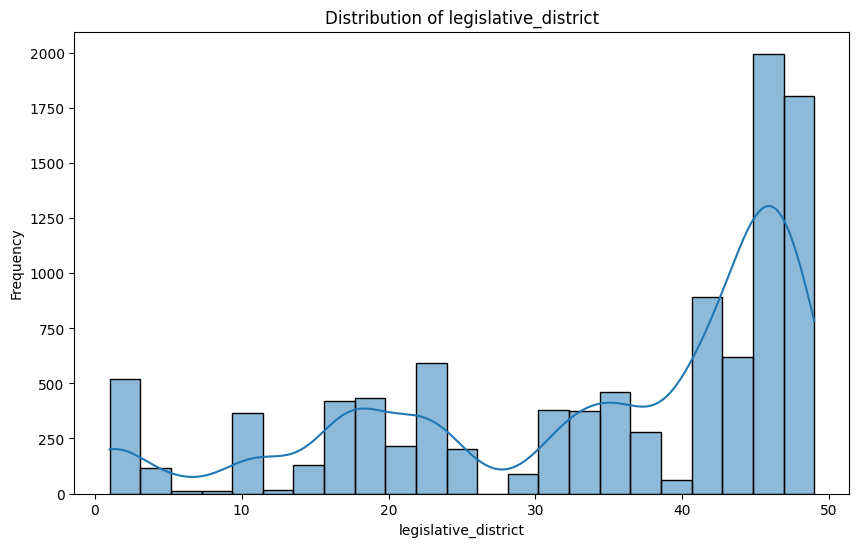

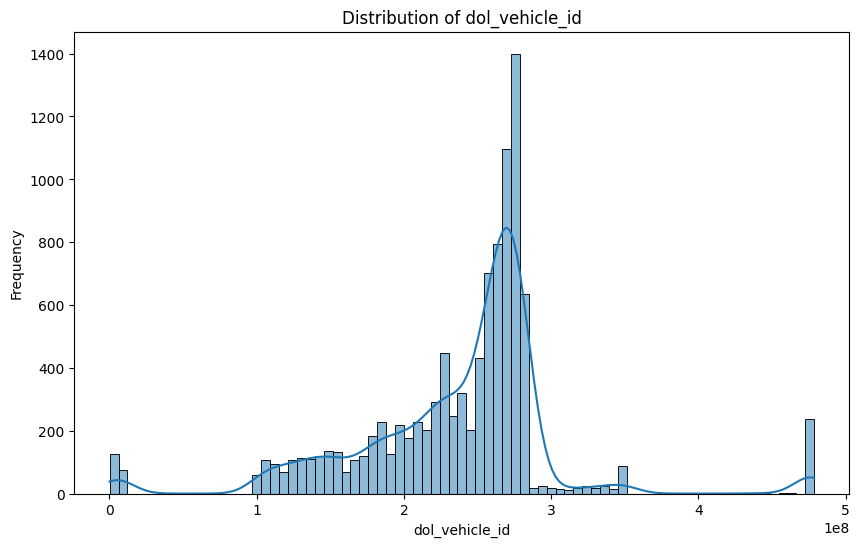

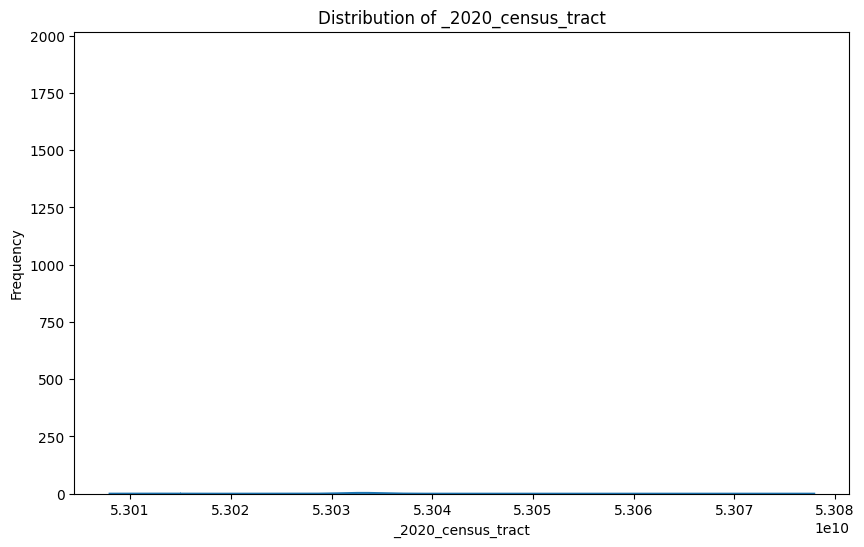

In [51]:
# General EDA

# Distribution of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

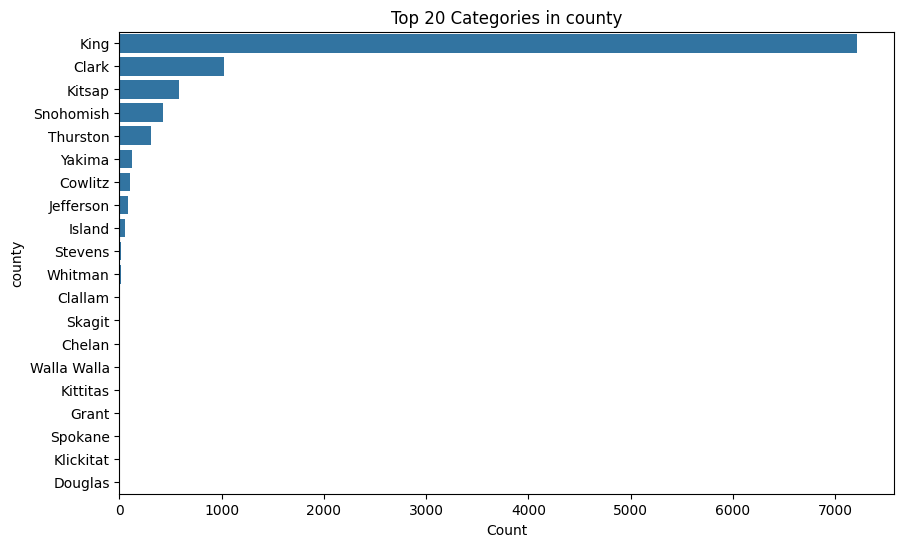

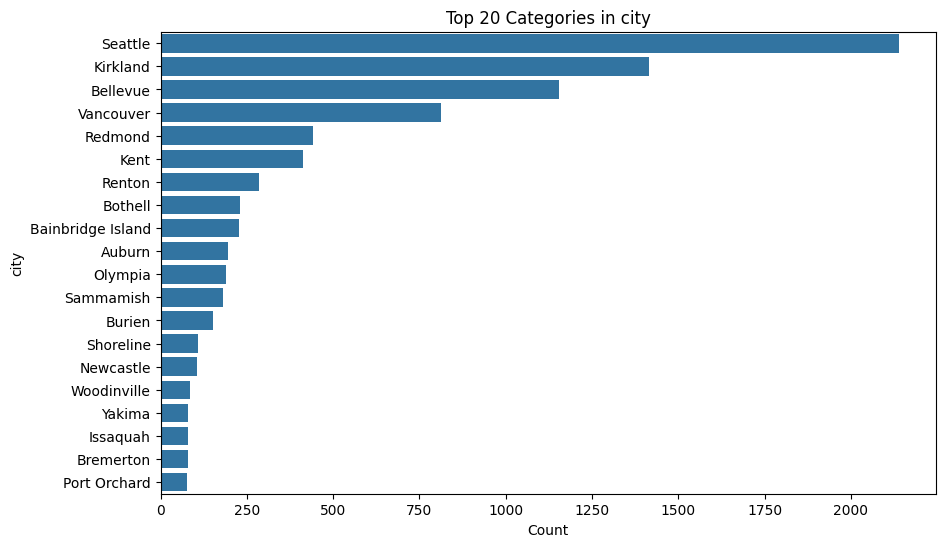

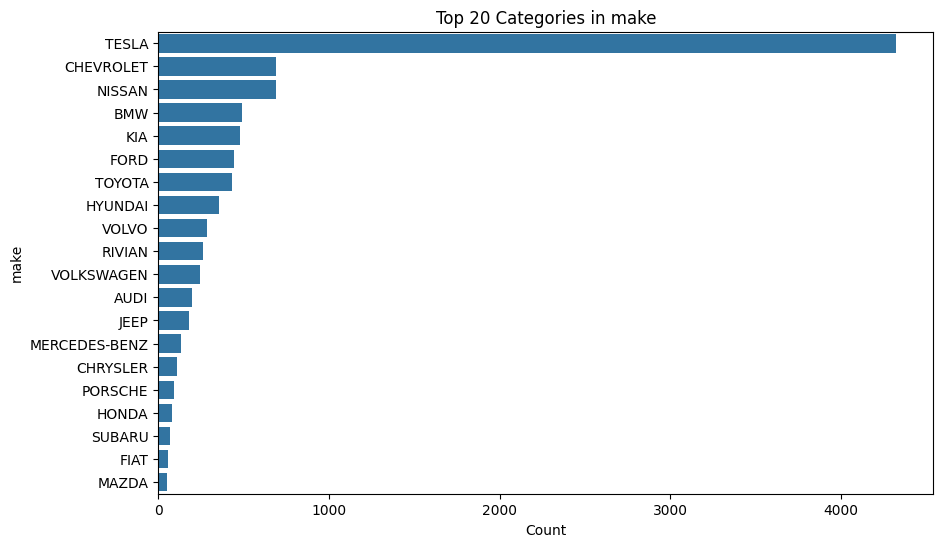

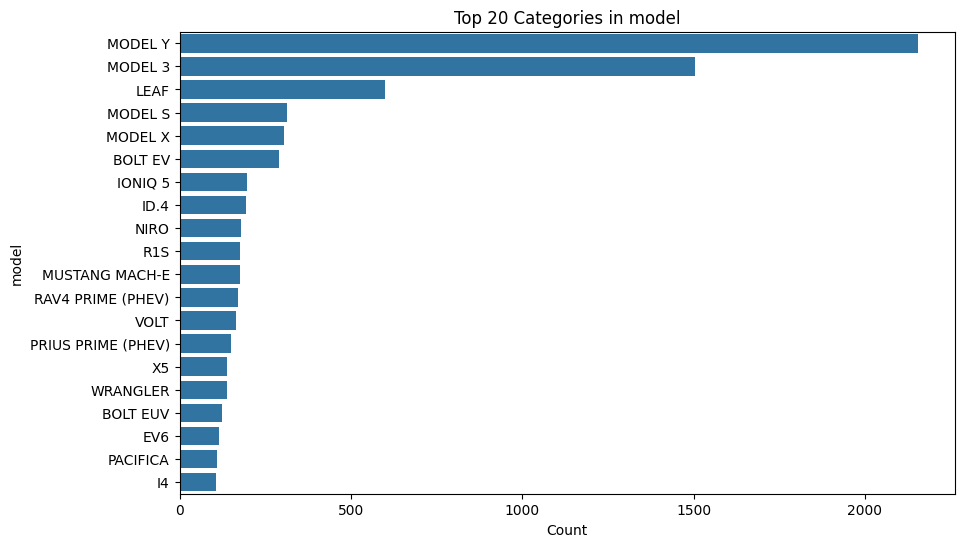

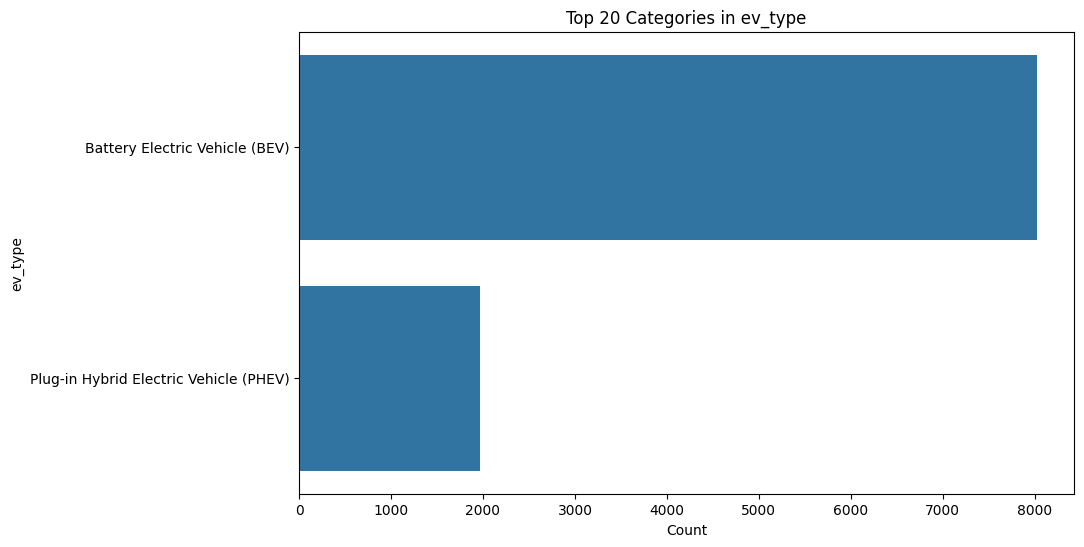

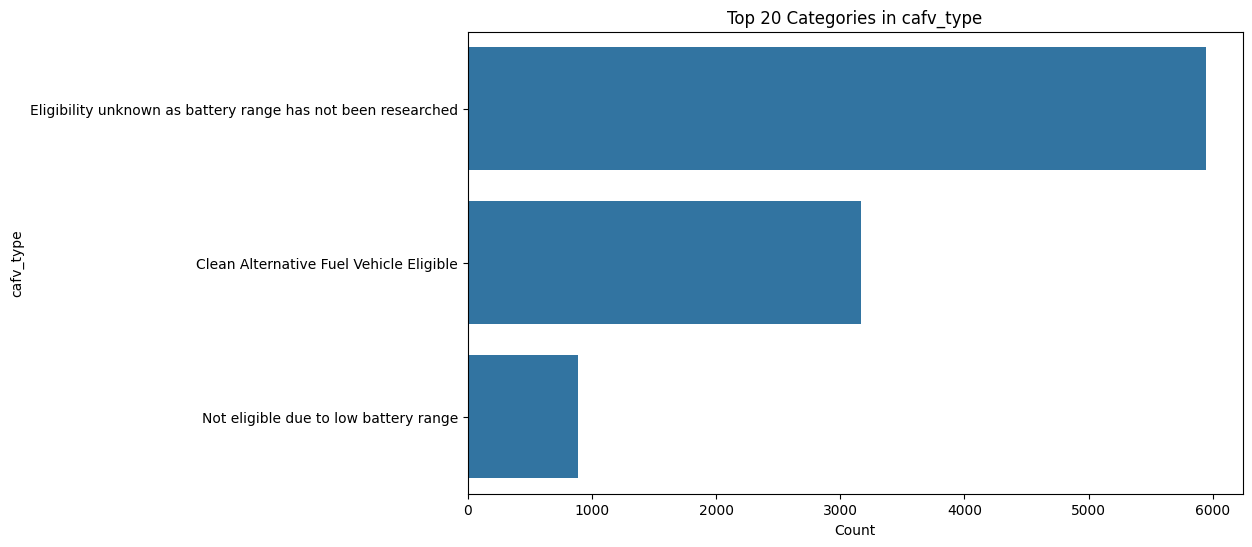

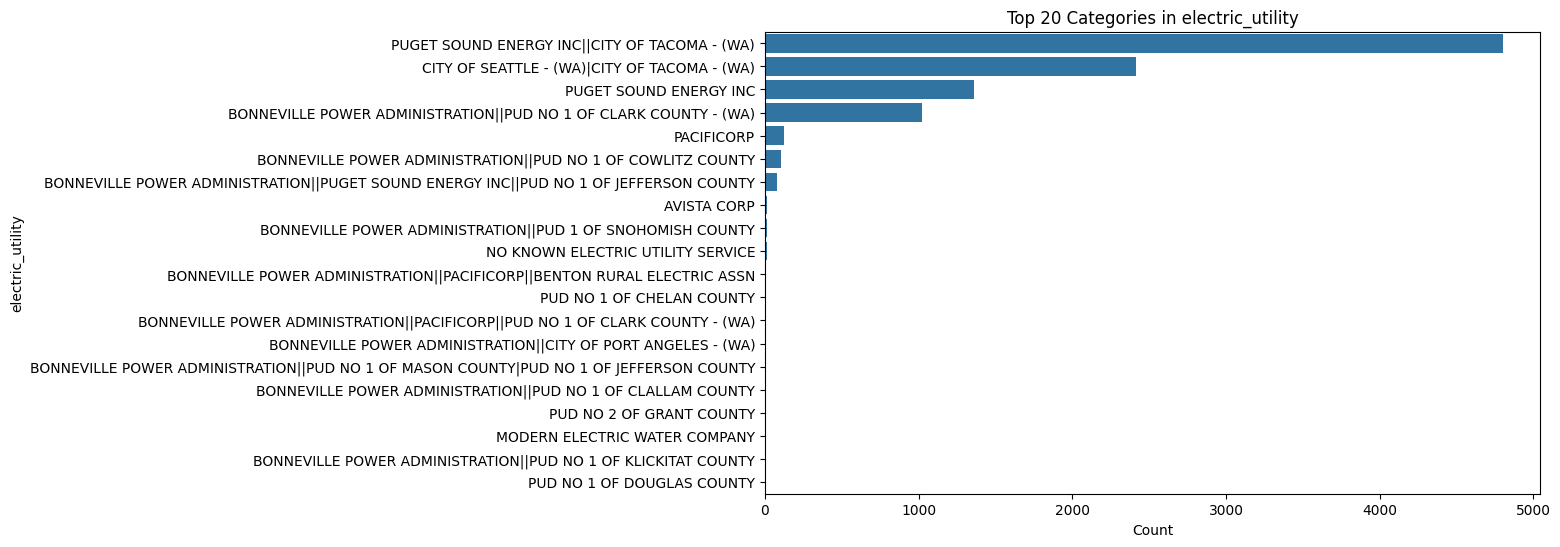

In [63]:
categorical_features = ['county', 'city', 'make', 'model', 'ev_type', 'cafv_type', 'electric_utility']
top_n = 20
for feature in categorical_features:
    top_value = df[feature].value_counts().nlargest(top_n).index
    df_plot = df[feature].where(df[feature].isin(top_value))
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_plot, order=top_value)
    plt.title(f'Top {top_n} Categories in {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()

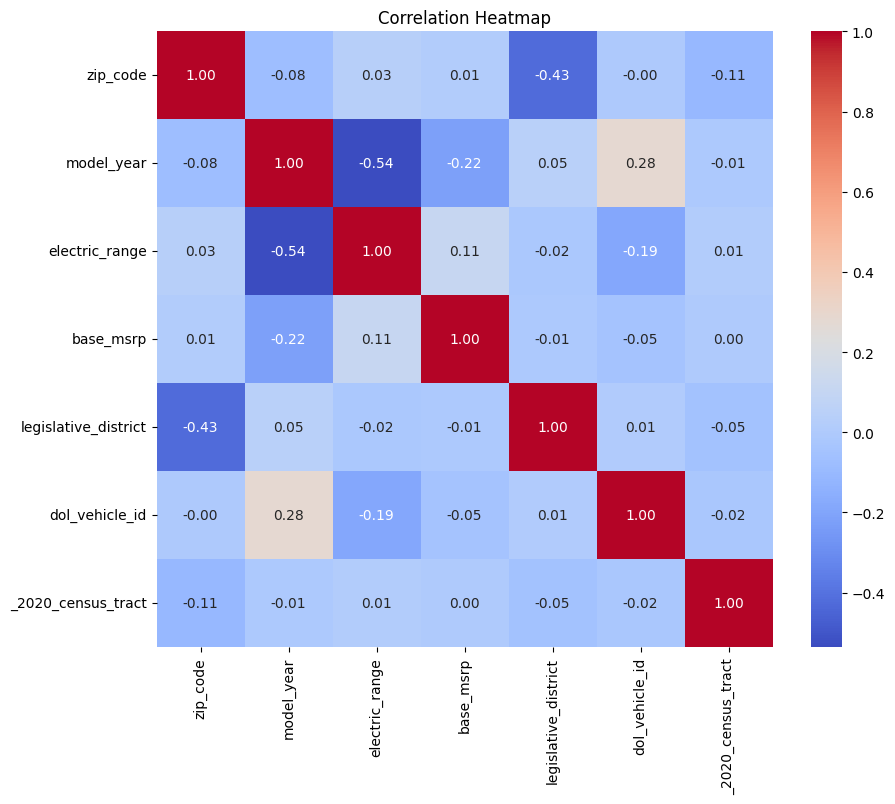

In [53]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
# Data Profiling Report
from ydata_profiling import ProfileReport

report = ProfileReport(df)
report.to_file("eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 26.44it/s]


/tmp/ipykernel_2150/3861536006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")


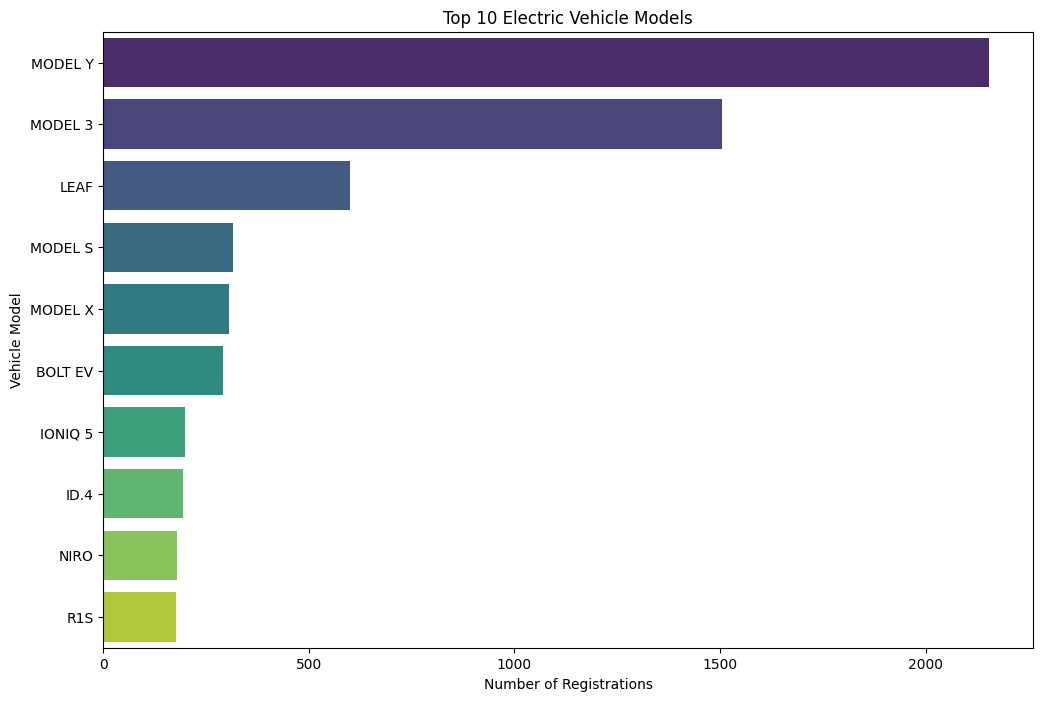

In [55]:
# Top 10 vehicle models
top_models = df['model'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_models.values, y=top_models.index, palette="viridis")
plt.title("Top 10 Electric Vehicle Models")
plt.xlabel("Number of Registrations")
plt.ylabel("Vehicle Model")
plt.show()